<p style="text-align:center">
    <a href="https://www.linkedin.com/company/mt-learners/?viewAsMember=true" target="_blank">
    <img src="https://github.com/Mr-MeerMoazzam/Mr-MeerMoazzam/blob/main/Untitled-2.jpg?raw=true" width="150" alt="MT Learners"  />
    </a>
</p>

# Support Vector Machine
In this notebook, you will use SVM (Support Vector Machines) to build and train a model social netword ads records, and classify a person purchased the car or not.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

# Importing required packages

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### loading the dataset

In [60]:
data=pd.read_csv("D:\csv files\Social_Network_Ads.csv")
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Analyzing and Visualizing the data

In [61]:
data.shape

(400, 5)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

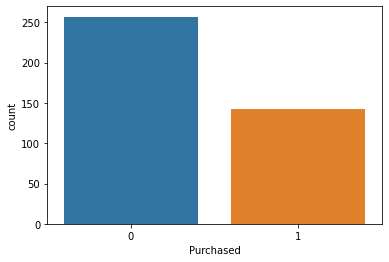

In [62]:
sns.countplot(x="Purchased",data=data)

<AxesSubplot:xlabel='Purchased', ylabel='count'>

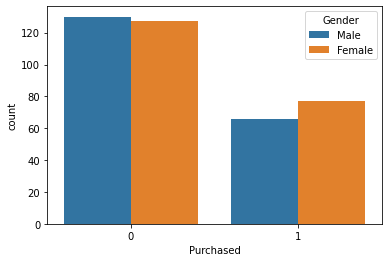

In [63]:
sns.countplot(x="Purchased",hue="Gender",data=data)

<AxesSubplot:ylabel='Frequency'>

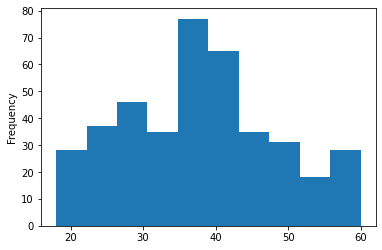

In [64]:
data["Age"].plot.hist()

In [70]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
 5   Male             400 non-null    uint8 
dtypes: int64(4), object(1), uint8(1)
memory usage: 16.1+ KB


now you can see that our gender feature is in not integer so we will convert it into another feature whose value will be binary. for this we will use get_dummies() method

In [66]:
sex=pd.get_dummies(data["Gender"],drop_first=True)
data=pd.concat([data,sex],axis=1)
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1


<AxesSubplot:>

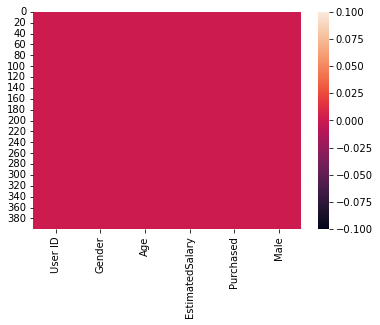

In [67]:
sns.heatmap(data.isnull())

### creating X and Y variable

In [68]:
X=data.iloc[:,[2,3,5]]
Y=data.iloc[:,4]
X

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [69]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

### splitting the data

In [73]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.33)

### feature scaling


In [95]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
X_train=sc_x.fit_transform(x_train)
X_test=sc_x.fit_transform(x_test)

### Modeling (SVM with Scikit-learn)


The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the linear for this tutorial.

# fitting the model

In [96]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(X_train, y_train) 

SVC()

After being fitted, the model can then be used to predict new values:

In [97]:
y_pred = model.predict(X_test)
y_pred 

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

## evaluating the model

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [99]:
f1_score(y_test, y_pred, average='weighted') 

0.8857674617488887

In [100]:
jaccard_score(y_test, y_pred,)

0.7457627118644068

In [101]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.89      0.92      0.91        79
           1       0.88      0.83      0.85        53

    accuracy                           0.89       132
   macro avg       0.89      0.88      0.88       132
weighted avg       0.89      0.89      0.89       132

Confusion matrix, without normalization
[[73  6]
 [ 9 44]]


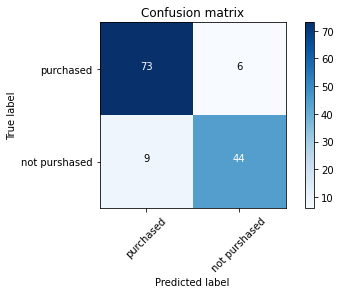

In [102]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, )
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['purchased','not purshased'],normalize= False,  title='Confusion matrix')

# Plottintg

Let's look at the distribution of the classes based on age  and salary:

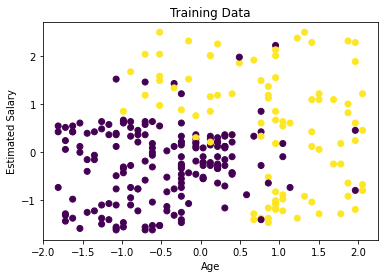

In [115]:
import matplotlib.pyplot as plt

plt.scatter(X_train[:, 0], X_train[:, 1],c=y_train)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Training Data')
plt.show()

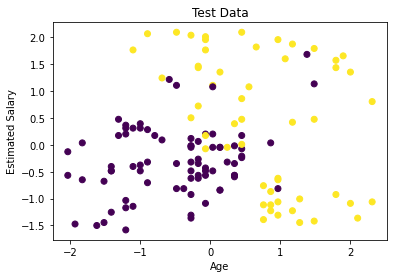

In [114]:
plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test)  
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Test Data')
plt.show()

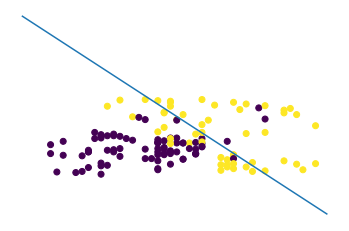

In [117]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the test set results
Y_Pred = classifier.predict(X_test)

# Plot data points

plt.scatter(X_test[:, 0], X_test[:, 1],c=y_test)  
#plt.scatter(X_Train[:, 0], X_Train[:, 1],c=Y_Train) 

# Create the hyperplane
w = classifier.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier.intercept_[0]) / w[1]  

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

### Building a Predictive System

In [138]:
input_data = (0,0,1)

# change the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)


input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardizing the input data
std_data = input_data_reshaped
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person has not  purchased')

else:
  print('the person has purchased')

[[0 0 1]]
[0]
The person has not  purchased


### Exercise
Can you rebuild the model, but this time with a rbf kernel? You can use kernel='rbf' option, when you define the svm. How the accuracy changes with the new kernel function?

### Thank you

## Author

<a href="https://www.linkedin.com/in/muhammad-bilal-afzal-95b33323b/">Muhammad Bilal</a>

<div data-mime-type="text/markdown" class="jp-RenderedHTMLCommon jp-RenderedMarkdown jp-MarkdownOutput">
<hr>

<h2></h2><h3 align="center"> © <a href="https://www.linkedin.com/company/mt-learners/">MT Learners</a> 2022. All rights reserved. </h3><h3></h3>

</div>